# 估算观测能力
 - 口径 25mm
 - 焦距 50mm
 - 像素大小 4.5微米
 - 光学透过率 60%
 - 量子效率 30%
 - 暗电流 10e/p/s
 - 天光 20等/平方角秒

In [6]:
import astrotoys.photometry as phot
f=phot.gmag2photrate(11.5)*np.pi*1.25**2*0.6*0.3*0.3
s=np.rad2deg(np.arctan(4.5e-6*1.5/5e-2)*2)*3600
b=(phot.gmag2photrate(20)*np.pi*1.25**2*0.6*0.3*s**2*0.3+10*0.1)
print(f/(f+b)**.5)

3.1041792860544954


300ms曝光时间，11.5等信噪比3.1。设Starlink v1.0版卫星1000km为6等（根据公开资料，对地一面5至7等，考虑卫星构型，侧面只会更亮），则至少可以探测4000km。

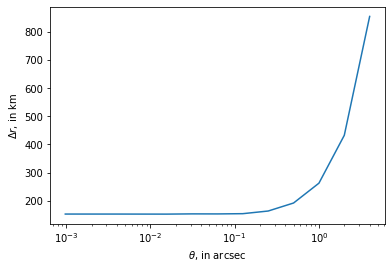

In [359]:
import astrotoys.mechanics as mech
from pymath.common import ptr2xyz,xyz2ptr,direction
reload(mech)
ob0=mech.SatelliteOrbit(6950, 1e-2, np.deg2rad(55), 0, 0)
dt=20.   # time interval between observations, in seconds
accuracy=[]
for n in range(13):
    delta=2.**(n-10) # astrometry accuracy, in arcsec
    T=1800.
    M=100
    dist=np.empty((M,))
    r0=ob0.state_when(0)[0]
    r1=ob0.state_when(dt)[0]
    r2=ob0.state_when(dt*2)[0]
    R0=np.double(ptr2xyz(0,np.deg2rad(40),6400))
    phi0, theta0, _ = xyz2ptr(*(r0-R0))
    phi1, theta1, _ = xyz2ptr(*(r1-R0))
    phi2, theta2, _ = xyz2ptr(*(r2-R0))
    for i in range(M):
        u0 = np.double(ptr2xyz(np.random.normal(phi0, np.deg2rad(delta/3600.)), np.random.normal(theta0, np.deg2rad(delta/3600.)), 1.))
        u1 = np.double(ptr2xyz(np.random.normal(phi1, np.deg2rad(delta/3600.)), np.random.normal(theta1, np.deg2rad(delta/3600.)), 1.))
        u2 = np.double(ptr2xyz(np.random.normal(phi2, np.deg2rad(delta/3600.)), np.random.normal(theta2, np.deg2rad(delta/3600.)), 1.))
        r,v=mech.goid([u0,u1,u2], [0,dt,dt*2], [R0,R0,R0])
        ob1=mech.SatelliteOrbit(*mech.find_orbit(r,v,mech.mu_SI['earth']/1e9))
        r0, _ = ob0.state_when(T)
        r1, _ = ob1.state_when(T)
        dist[i] = np.sum((r1-r0)**2.)**.5
    accuracy.append(np.mean(dist))
plt.semilogx(2.**(np.arange(13)-10), accuracy)
plt.xlabel(r'$\theta$, in arcsec')
plt.ylabel(r'$\Delta r$, in km')
plt.savefig('dr_vs_dt.png')

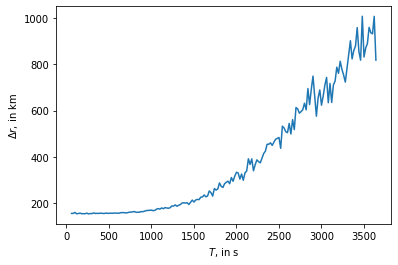

In [376]:
ob0=mech.SatelliteOrbit(6950, 1e-2, np.deg2rad(55), 0, 0)
dt=20.   # time interval between observations, in seconds
delta=1. # astrometry accuracy, in arcsec
accuracy=[]
N=180
for n in range(N):
    T=(n+3)*dt
    M=200
    dist=np.empty((M,))
    r0=ob0.state_when(0)[0]
    r1=ob0.state_when(dt)[0]
    r2=ob0.state_when(dt*2)[0]
    R0=np.double(ptr2xyz(0,np.deg2rad(40),6400))
    phi0, theta0, _ = xyz2ptr(*(r0-R0))
    phi1, theta1, _ = xyz2ptr(*(r1-R0))
    phi2, theta2, _ = xyz2ptr(*(r2-R0))
    for i in range(M):
        u0 = np.double(ptr2xyz(np.random.normal(phi0, np.deg2rad(delta/3600.)), np.random.normal(theta0, np.deg2rad(delta/3600.)), 1.))
        u1 = np.double(ptr2xyz(np.random.normal(phi1, np.deg2rad(delta/3600.)), np.random.normal(theta1, np.deg2rad(delta/3600.)), 1.))
        u2 = np.double(ptr2xyz(np.random.normal(phi2, np.deg2rad(delta/3600.)), np.random.normal(theta2, np.deg2rad(delta/3600.)), 1.))
        r,v=mech.goid([u0,u1,u2], [0,dt,dt*2], [R0,R0,R0])
        ob1=mech.SatelliteOrbit(*mech.find_orbit(r,v,mech.mu_SI['earth']/1e9))
        r0, _ = ob0.state_when(T)
        r1, _ = ob1.state_when(T)
        dist[i] = np.sum((r1-r0)**2.)**.5
    accuracy.append(np.mean(dist))
plt.plot(np.arange(3*dt, (N+3)*dt, dt), accuracy)
plt.xlabel(r'$T$, in s')
plt.ylabel(r'$\Delta r$, in km')
plt.savefig('dr_vs_T.png')

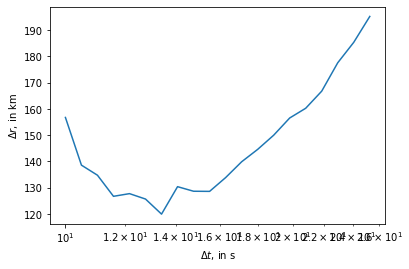

In [373]:
ob0=mech.SatelliteOrbit(6950, 1e-2, np.deg2rad(55), 0, 0)
delta=1. # astrometry accuracy, in arcsec
accuracy=[]
N=20
gamma=1.05
for dt in 10.*gamma**np.arange(N):
    T=10.*dt
    M=200
    dist=np.empty((M,))
    r0=ob0.state_when(0)[0]
    r1=ob0.state_when(dt)[0]
    r2=ob0.state_when(dt*2)[0]
    R0=np.double(ptr2xyz(0,np.deg2rad(40),6400))
    phi0, theta0, _ = xyz2ptr(*(r0-R0))
    phi1, theta1, _ = xyz2ptr(*(r1-R0))
    phi2, theta2, _ = xyz2ptr(*(r2-R0))
    for i in range(M):
        u0 = np.double(ptr2xyz(np.random.normal(phi0, np.deg2rad(delta/3600.)), np.random.normal(theta0, np.deg2rad(delta/3600.)), 1.))
        u1 = np.double(ptr2xyz(np.random.normal(phi1, np.deg2rad(delta/3600.)), np.random.normal(theta1, np.deg2rad(delta/3600.)), 1.))
        u2 = np.double(ptr2xyz(np.random.normal(phi2, np.deg2rad(delta/3600.)), np.random.normal(theta2, np.deg2rad(delta/3600.)), 1.))
        r,v=mech.goid([u0,u1,u2], [0,dt,dt*2], [R0,R0,R0])
        ob1=mech.SatelliteOrbit(*mech.find_orbit(r,v,mech.mu_SI['earth']/1e9))
        r0, _ = ob0.state_when(T)
        r1, _ = ob1.state_when(T)
        dist[i] = np.sum((r1-r0)**2.)**.5
    accuracy.append(np.mean(dist))
plt.semilogx(10.*gamma**np.arange(N), accuracy)
plt.xlabel(r'$\Delta t$, in s')
plt.ylabel(r'$\Delta r$, in km')
plt.savefig('dr_vs_tau.png')